In [1]:
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

cifar10_dir = 'datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [2]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))


# As a sanity check, print out the shapes of the data
print ('Training data shape: ', X_train.shape)
print ('Test data shape: ', X_test.shape)


Training data shape:  (50000, 3072)
Test data shape:  (10000, 3072)


In [3]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)

In [4]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_test -= mean_image

In [5]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
print (X_train.shape, X_test.shape)


(50000, 3073) (10000, 3073)


In [6]:
def grad_calc(grad, X, y, margins, num_train):
  X_mask = np.zeros(margins.shape)
  X_mask[margins > 0] = 1
 
  incorrect_counts = np.sum(X_mask, axis=1)
  X_mask[np.arange(num_train), y] = -incorrect_counts
  grad = X.T.dot(X_mask)
  return grad

In [7]:
def svm_loss(W, X, y, lr):
  dW = np.zeros(W.shape) # initialize the gradient as zero

  # compute the loss and the gradient
  num_classes = W.shape[1]
  num_train = X.shape[0]
  loss = 0.0
  scores = X.dot(W)
  class_score = scores[np.arange(num_train), y]

  delta=1.0
  margins = np.maximum(0, scores - class_score[:, np.newaxis] + delta)
  margins[np.arange(num_train),y]=0
  loss = np.sum(margins)/num_train
  regularization_loss = 0.5*lr*(W*W)
  loss += regularization_loss
  dW = grad_calc(dW, X, y, margins, num_train)
  dW /= num_train
  dW += lr*W
  return loss, dW  

In [8]:
W = np.random.randn(3073, 10)*0.00001

In [16]:
def train_model(W, X, y, lr, reg, iter, batch_size):
  num_classes = W.shape[1]
  num_train = X.shape[0]
  losses = []
  for it in xrange(iter):
        batch = np.random.choice(np.arange(num_train), batch_size)
        batch_train = X[batch]
        batch_class = y[batch]
        loss, grad = svm_loss(W, batch_train, batch_class, reg)
        W += -lr*grad

  return losses, W
        
        

In [17]:
loss_rec, W = train_model(W, X_train, y_train, lr=2.507500e-06, reg=1.000000e+03, iter=1500, batch_size=200)

In [11]:
y_pred = np.zeros(X_test.shape[1])
print (y_pred.shape)

(3073,)


In [12]:
y_pred = np.argmax(X_test.dot(W), axis = 1)

In [13]:
print (y_pred)

[3 9 0 ..., 1 6 2]


In [14]:
print (np.mean(y_pred == y_test))

0.2934


In [15]:
print(W)

[[  1.18471483e-04   8.23312448e-05  -1.23541896e-04 ...,  -1.95145693e-04
    3.37860733e-04  -9.28989372e-05]
 [  9.69604126e-05  -4.87225099e-05  -1.16713185e-04 ...,  -5.71582652e-06
    1.88882974e-04   2.40628314e-04]
 [  5.39438620e-04   1.65118334e-04  -5.39160531e-04 ...,   3.14671755e-04
    3.68431121e-04   5.14066706e-04]
 ..., 
 [  3.24722084e-06  -1.00765983e-04  -8.49435631e-05 ...,   3.14266899e-04
    5.14501892e-06   2.66316379e-04]
 [  3.99177469e-05   4.63335410e-05  -2.21811755e-04 ...,  -1.96469350e-04
    3.45020364e-04   2.76754390e-04]
 [ -1.60128034e-05  -3.40921197e-05   7.46169189e-05 ...,   1.96148750e-05
   -9.36534076e-05  -5.08636506e-05]]


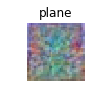

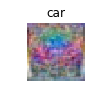

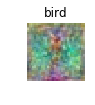

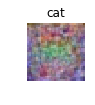

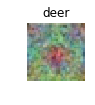

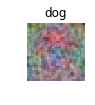

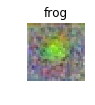

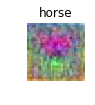

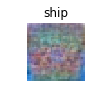

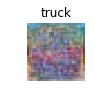

In [23]:
w = W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in xrange(10):
  plt.subplot(2, 5, i + 1)
    
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])
  plt.show()